# データをまとめるgroupby

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame

In [5]:
dframe = DataFrame({'k1':['X','X','Y','Y','Z'],
                   'k2':['alpha', 'beta', 'alpha', 'beta', 'alpha'],
                   'dataset1':np.random.randn(5),
                    'dataset2':np.random.randn(5)})

In [7]:
dframe

,dataset1,dataset2,k1,k2
0,1.774772,-0.408829,X,alpha
1,-1.251415,-1.343082,X,beta
2,2.290675,0.057018,Y,alpha
3,-1.872431,-0.427735,Y,beta
4,-0.265876,-0.296055,Z,alpha


In [8]:
group1 = dframe['dataset1'].groupby(dframe['k1'])

In [9]:
group1

In [10]:
group1.mean()

k1
X    0.261678
Y    0.209122
Z   -0.265876
Name: dataset1, dtype: float64

In [11]:
cities = np.array(['NY', 'LA', 'LA', 'NY', 'NY'])
month = np.array(['JAN', 'FEB', 'JAN', 'FEB', 'JAN'])

In [12]:
dframe

,dataset1,dataset2,k1,k2
0,1.774772,-0.408829,X,alpha
1,-1.251415,-1.343082,X,beta
2,2.290675,0.057018,Y,alpha
3,-1.872431,-0.427735,Y,beta
4,-0.265876,-0.296055,Z,alpha


In [14]:
dframe['dataset1'].groupby([cities, month]).mean()

LA  FEB   -1.251415
    JAN    2.290675
NY  FEB   -1.872431
    JAN    0.754448
Name: dataset1, dtype: float64

In [15]:
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,0.261678,-0.875956
Y,0.209122,-0.185358
Z,-0.265876,-0.296055


In [17]:
dframe.groupby(['k1', 'k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha  1.774772 -0.408829
   beta  -1.251415 -1.343082
Y  alpha  2.290675  0.057018
   beta  -1.872431 -0.427735
Z  alpha -0.265876 -0.296055

In [20]:
dataset2_group = dframe.groupby(['k1', 'k2'])[['dataset2']]
dataset2_group.mean()

dataset2
k1 k2             
X  alpha -0.408829
   beta  -1.343082
Y  alpha  0.057018
   beta  -0.427735
Z  alpha -0.296055

In [21]:
dframe.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [22]:
for name, group in dframe.groupby('k1'):
    print('This is the {} group'.format(name))
    print(group)
    print('\n')

This is the X group
   dataset1  dataset2 k1     k2
0  1.774772 -0.408829  X  alpha
1 -1.251415 -1.343082  X   beta


This is the Y group
   dataset1  dataset2 k1     k2
2  2.290675  0.057018  Y  alpha
3 -1.872431 -0.427735  Y   beta


This is the Z group
   dataset1  dataset2 k1     k2
4 -0.265876 -0.296055  Z  alpha




In [23]:
for name, group in dframe.groupby(['k1', 'k2']):
    print('This is the {} group'.format(name))
    print(group)
    print('\n')

This is the ('X', 'alpha') group
   dataset1  dataset2 k1     k2
0  1.774772 -0.408829  X  alpha


This is the ('X', 'beta') group
   dataset1  dataset2 k1    k2
1 -1.251415 -1.343082  X  beta


This is the ('Y', 'alpha') group
   dataset1  dataset2 k1     k2
2  2.290675  0.057018  Y  alpha


This is the ('Y', 'beta') group
   dataset1  dataset2 k1    k2
3 -1.872431 -0.427735  Y  beta


This is the ('Z', 'alpha') group
   dataset1  dataset2 k1     k2
4 -0.265876 -0.296055  Z  alpha




In [24]:
gr = dframe.groupby('k1')
gr.get_group('X')

,dataset1,dataset2,k1,k2
0,1.774772,-0.408829,X,alpha
1,-1.251415,-1.343082,X,beta


# データをまとめるgroupbyその２

In [25]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [28]:
animals = DataFrame(np.arange(16).reshape((4,4)),
                                         columns = ['W', 'X', 'Y', 'Z'],
                                         index=['dog', 'cat', 'bird', 'mouse'])

In [29]:
animals

,W,X,Y,Z
dog,0,1,2,3
cat,4,5,6,7
bird,8,9,10,11
mouse,12,13,14,15


In [30]:
animals.ix[1:2, ['W', 'Y']] = np.nan
animals

,W,X,Y,Z
dog,0.0,1,2.0,3
cat,NaN,5,NaN,7
bird,8.0,9,10.0,11
mouse,12.0,13,14.0,15


In [33]:
behavior_map = {'W':'bad', 'X':'good', 'Y':'bad', 'Z':'good'}
behavior_map

{'W': 'bad', 'X': 'good', 'Y': 'bad', 'Z': 'good'}

In [34]:
animals_col = animals.groupby(behavior_map, axis=1)

In [35]:
animals_col.sum()

,bad,good
dog,2.0,4.0
cat,NaN,12.0
bird,18.0,20.0
mouse,26.0,28.0


In [36]:
animals

,W,X,Y,Z
dog,0.0,1,2.0,3
cat,NaN,5,NaN,7
bird,8.0,9,10.0,11
mouse,12.0,13,14.0,15


In [37]:
animals.groupby(len).sum()
# lenがindexの長さに適用される

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


In [38]:
keys = ['A', 'B', 'A', 'B']

In [39]:
animals.groupby([len, keys]).max()

W   X     Y   Z
3 A   0.0   1   2.0   3
  B   NaN   5   NaN   7
4 A   8.0   9  10.0  11
5 B  12.0  13  14.0  15

# データのAggregation

In [40]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [41]:
!cat winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5
7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5
5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5
7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5
8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5
8.9;0.62;0.19;3.9;0.17;51;148;0.9986;3.17;0.93;9.2;5
8.5;0.28;

In [42]:
dframe_wine = pd.read_csv('winequality-red.csv', sep=';')

In [43]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
# alcoholの平均値
dframe_wine['alcohol'].mean()

10.422983114446502

In [46]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [47]:
wino = dframe_wine.groupby('quality')

In [48]:
wino.describe()

alcohol   chlorides  citric acid     density  fixed acidity  \
quality                                                                         
3       count   10.000000   10.000000    10.000000   10.000000      10.000000   
        mean     9.955000    0.122500     0.171000    0.997464       8.360000   
        std      0.818009    0.066241     0.250664    0.002002       1.770875   
        min      8.400000    0.061000     0.000000    0.994710       6.700000   
        25%      9.725000    0.079000     0.005000    0.996150       7.150000   
        50%      9.925000    0.090500     0.035000    0.997565       7.500000   
        75%     10.575000    0.143000     0.327500    0.998770       9.875000   
        max     11.000000    0.267000     0.660000    1.000800      11.600000   
4       count   53.000000   53.000000    53.000000   53.000000      53.000000   
        mean    10.265094    0.090679     0.174151    0.996542       7.779245   
        std      0.934776    0.076192     0.201030    0.001575       1.626624   
        min      9.000000    0.045000     0.000000    0.993400       4.600000   
        25%      9.600000    0.067000     0.030000    0.995650       6.800000   
        50%     10.000000    0.080000     0.090000    0.996500       7.500000   
        75%     11.000000    0.089000     0.270000    0.997450       8.400000   
        max     13.100000    0.610000     1.000000    1.001000      12.500000   
5       count  681.000000  681.000000   681.000000  681.000000     681.000000   
        mean     9.899706    0.092736     0.243686    0.997104       8.167254   
        std      0.736521    0.053707     0.180003    0.001589       1.563988   
        min      8.500000    0.039000     0.000000    0.992560       5.000000   
        25%      9.400000    0.074000     0.090000    0.996200       7.100000   
        50%      9.700000    0.081000     0.230000    0.997000       7.800000   
        75%     10.200000    0.094000     0.360000    0.997900       8.900000   
        max     14.900000    0.611000     0.790000    1.003150      15.900000   
6       count  638.000000  638.000000   638.000000  638.000000     638.000000   
        mean    10.629519    0.084956     0.273824    0.996615       8.347179   
        std      1.049639    0.039563     0.195108    0.002000       1.797849   
        min      8.400000    0.034000     0.000000    0.990070       4.700000   
        25%      9.800000    0.068250     0.090000    0.995402       7.000000   
        50%     10.500000    0.078000     0.260000    0.996560       7.900000   
        75%     11.300000    0.088000     0.430000    0.997893       9.400000   
        max     14.000000    0.415000     0.780000    1.003690      14.300000   
7       count  199.000000  199.000000   199.000000  199.000000     199.000000   
        mean    11.465913    0.076588     0.375176    0.996104       8.872362   
        std      0.961933    0.029456     0.194432    0.002176       1.992483   
        min      9.200000    0.012000     0.000000    0.990640       4.900000   
        25%     10.800000    0.062000     0.305000    0.994765       7.400000   
        50%     11.500000    0.073000     0.400000    0.995770       8.800000   
        75%     12.100000    0.087000     0.490000    0.997360      10.100000   
        max     14.000000    0.358000     0.760000    1.003200      15.600000   
8       count   18.000000   18.000000    18.000000   18.000000      18.000000   
        mean    12.094444    0.068444     0.391111    0.995212       8.566667   
        std      1.224011    0.011678     0.199526    0.002378       2.119656   
        min      9.800000    0.044000     0.030000    0.990800       5.000000   
        25%     11.325000    0.062000     0.302500    0.994175       7.250000   
        50%     12.150000    0.070500     0.420000    0.994940       8.250000   
        75%     12.875000    0.075500     0.530000    0.997200      10.225000   
        max     14.000000    0.086000     0.72000

In [49]:
# グループごとに最大-最小がでてくる
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [51]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [52]:
dframe_wine['qual/alc ratio'] = dframe_wine['quality'] / dframe_wine['alcohol']

In [53]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.531915
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.510204
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.510204
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.612245
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.531915
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0.531915
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0.531915
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,0.700000
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,0.736842
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0.476190


In [54]:
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [55]:
%matplotlib inline

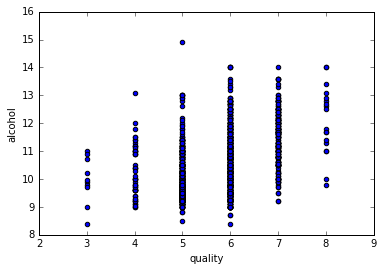

In [57]:
dframe_wine.plot(kind='scatter', x='quality', y='alcohol')

In [58]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.531915
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.510204
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.510204
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.612245
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.531915
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0.531915
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0.531915
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,0.700000
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,0.736842
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0.476190
